# Dataset 2D creating

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio

X = np.random.rand(100,2)
print(x)
X.shape[0]

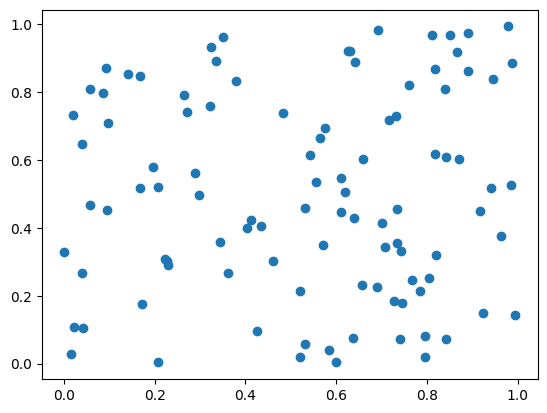

In [7]:
plt.scatter(X[:,0],X[:,1])

# k-means implementation

In [9]:
def partitions_equal(p1, p2):
    if p1.keys() != p2.keys():
        return False
    for k in p1:
        if len(p1[k]) != len(p2[k]):
            return False
        for a, b in zip(p1[k], p2[k]):
            if not np.array_equal(a, b):
                return False
    return True

import numpy as np

def kmeans(X, k, max_iters=100):
    
    X = np.array(X)  # pretvori listu tenzora/vektora u NumPy array
    n_samples = len(X)
    
    X_flat = X.reshape(n_samples, -1) #flattenam podatke da mogu ovaj kmeans koristit za bilo koji tip podataka

    # Inicijalizacija klastera: random stavljam tocke u neke klastere prvo
    cluster_ids = np.random.randint(0, k, size=n_samples)
    
    centroids = np.zeros((k, X_flat.shape[1]))

    for i in range(k):
        points_in_cluster = X_flat[cluster_ids == i]
        if len(points_in_cluster) > 0:
            centroids[i] = points_in_cluster.mean(axis=0)
        else:
            centroids[i] = X_flat[np.random.randint(0, n_samples)]

    for iteration in range(max_iters):

        distances = np.linalg.norm(
            X_flat[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2
        )
        new_cluster_ids = np.argmin(distances, axis=1)

        if np.array_equal(cluster_ids, new_cluster_ids):
            break

        cluster_ids = new_cluster_ids
        
        for i in range(k):
            members = X_flat[cluster_ids == i]
            if len(members) > 0:
                centroids[i] = members.mean(axis=0)
            else:
                centroids[i] = X_flat[np.random.randint(0, n_samples)]

    
    
    return centroids, cluster_ids


# checking k-means for 2D dataset

In [50]:
colors = ['red', 'green', 'blue']  
centroids, partition = kmeans(X, k=3)
centroids 


array([[0.18185263, 0.48275197],
       [0.70089783, 0.2386414 ],
       [0.71229053, 0.78651648]])

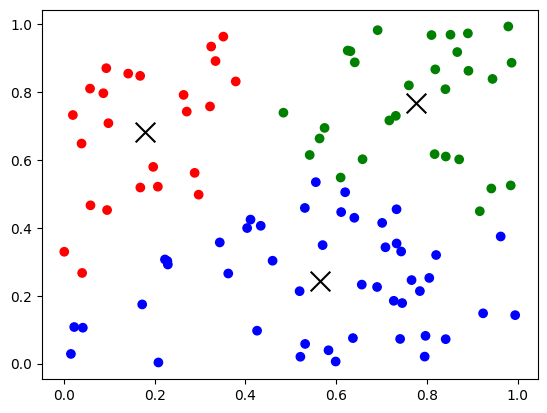

In [52]:
centroids, cluster_ids = kmeans(X, k=3)
plt.scatter(X[:,0],X[:,1], c=[colors[i] for i in cluster_ids])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='black')   

# MNIST dataset
Vec je spremljen u pytorchu jej: https://discuss.pytorch.org/t/loading-mnist-from-pytorch/137456

In [20]:
from torchvision import datasets, transforms
import torchvision
KWARGS = {'root':'./data', 'train':True, 'download':True, 'transform':transforms.ToTensor()}
trainset=torchvision.datasets.MNIST(**KWARGS)

100.0%
100.0%
100.0%
100.0%


In [63]:
shape = trainset.data.shape
print(shape)
trainset.data[0]
len(trainset.data)

torch.Size([60000, 28, 28])


60000

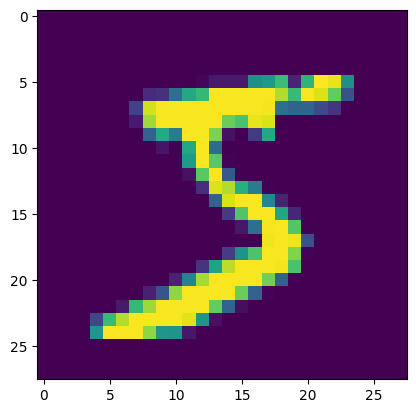

In [24]:
import matplotlib.pyplot as plt
plt.imshow(trainset.data[0])

# k - means on MNIST

In [ ]:

# k - means on MNIST
centroids, partition = kmeans(trainset.data , k=10, max_iters=20 )


C:\Users\dijan\AppData\Local\Temp\ipykernel_53060\3236289577.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X = np.array(X)  # pretvori listu tenzora u NumPy array


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import umap

X_full = trainset.data.numpy()  # ako je PyTorch tensor, pretvori u NumPy
n_samples = len(X_full)

X_flat = X_full.reshape(n_samples, -1)

centroids, partition = kmeans(X_flat, k=10, max_iters=20)



C:\Users\dijan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


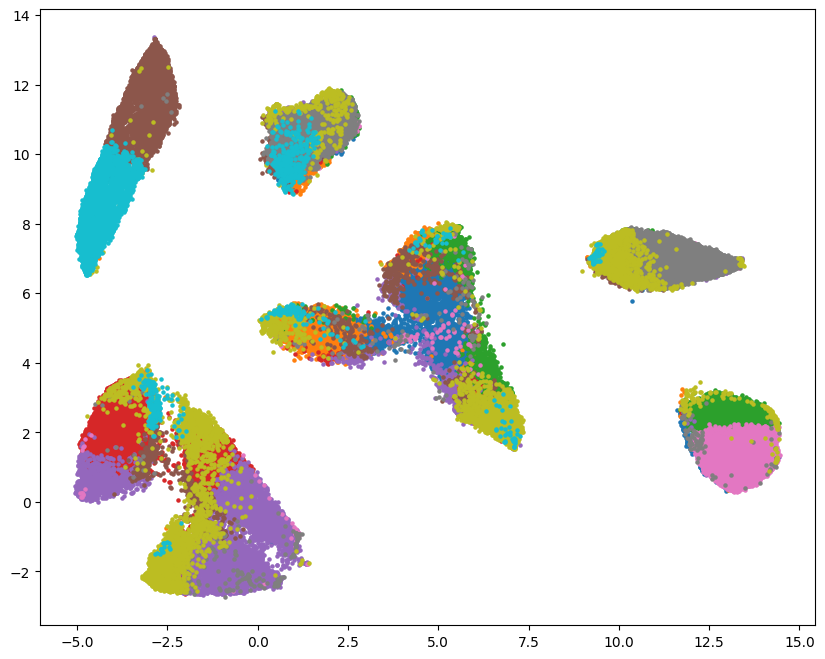

In [74]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2)
X_2d = umap_model.fit_transform(X_flat)

# Scatter plot svih točaka, boje po klasteru
plt.figure(figsize=(10,8))
for cluster_id in range(10):
    points = X_2d[partition == cluster_id]
    plt.scatter(points[:,0], points[:,1], label=f'Cluster {cluster_id}', s=5)  # smanjen size zbog velikog broja točaka


# K-means with QR

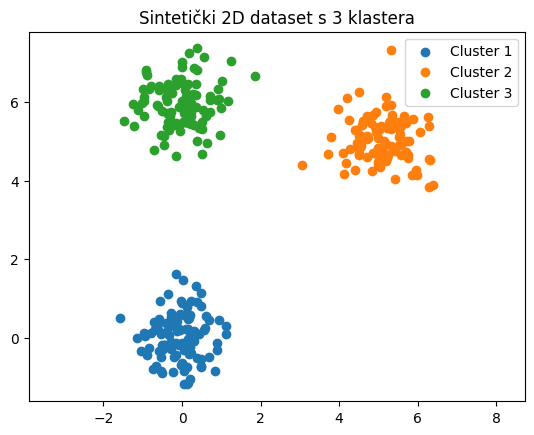

In [3]:
# generating synentic data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_per_cluster = 100

centers = np.array([
    [0, 0],
    [5, 5],
    [0, 6]
])

sigma = 0.6

X1 = centers[0] + sigma * np.random.randn(n_per_cluster, 2)
X2 = centers[1] + sigma * np.random.randn(n_per_cluster, 2)
X3 = centers[2] + sigma * np.random.randn(n_per_cluster, 2)

A = np.vstack([X1, X2, X3])

plt.scatter(X1[:,0], X1[:,1], label="Cluster 1")
plt.scatter(X2[:,0], X2[:,1], label="Cluster 2")
plt.scatter(X3[:,0], X3[:,1], label="Cluster 3")
plt.legend()
plt.axis("equal")
plt.title("Sintetički 2D dataset s 3 klastera")
plt.show()



In [5]:
from scipy.linalg import qr

def kmeans_QR(A, k):
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    X = U[:, :k]                 # spektralni embedding

    Q, R, P = qr(X.T, pivoting=True)

    R1 = R[:, :k]
    R2 = R[:, k:]

    # koordinate u bazi klastera
    C = np.linalg.lstsq(R1, R, rcond=None)[0]

    # vrati originalni redoslijed točaka
    C = C[:, np.argsort(P)]

    # dodjela klastera
    labels = np.argmax(np.abs(C), axis=0)

    return labels




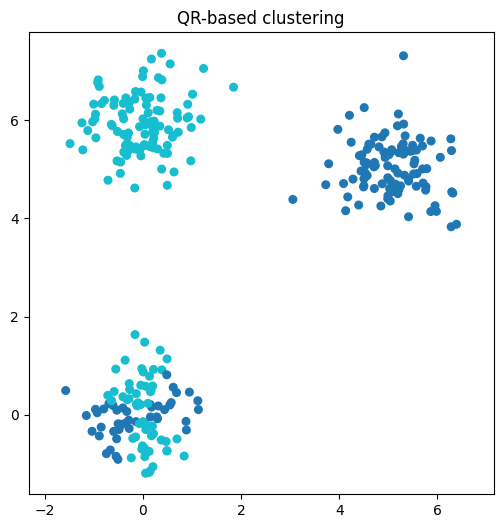

Adjusted Rand Index: 0.444


In [8]:
# Testing on my synthetic data
from sklearn.metrics import adjusted_rand_score

labels = kmeans_QR(A, k=3)

plt.figure(figsize=(6,6))
plt.scatter(A[:,0], A[:,1], c=labels, cmap="tab10", s=30)
plt.title("QR-based clustering")
plt.axis("equal")
plt.show()

true_labels = np.repeat([0,1,2], n_per_cluster)

ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index: {ari:.3f}")

In [ ]:
#comparing with k-means
centroids, kmeans_labels = kmeans(A, k=3, max_iters=100)
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
print(f"Adjusted Rand Index (k-means): {ari_kmeans:.3f}")


Adjusted Rand Index (k-means): 1.000


# Clustering using spectral cuts

In [12]:

def adjacency_matrix(A, sigma=1.0):
    from scipy.spatial.distance import pdist, squareform

    pairwise_dists = squareform(pdist(A, metric='euclidean'))
    W = np.exp(-pairwise_dists**2 / (2 * sigma**2))
    np.fill_diagonal(W, 0)  
    return W


def symmetric_normalized_laplacian(W):
    D = np.diag(np.sum(W, axis=1))
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))
    L_sym = np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt
    return L_sym

def spectral_clustering(A, k, sigma=1.0, max_iters=100):
    W = adjacency_matrix(A, sigma)
    L_sym = symmetric_normalized_laplacian(W)

    eigvals, eigvecs = np.linalg.eigh(L_sym)
    Z = eigvecs[:, :k]
    n = A.shape[0]

    Q = np.eye(k)
    X_prev = None
    for _ in range(max_iters):
        ZQ = Z @ Q
       
        X = np.zeros((n, k))
        for i in range(n):
            j = np.argmax(np.abs(ZQ[i, :]))
            X[i, j] = 1
        
        M = X.T @ Z
        U, _, VT = np.linalg.svd(M)
        Q = VT.T @ U.T
        if X_prev is not None and np.array_equal(X, X_prev):
            break
        X_prev = X

    labels = np.argmax(X, axis=1)
    return labels
    

            


    
    

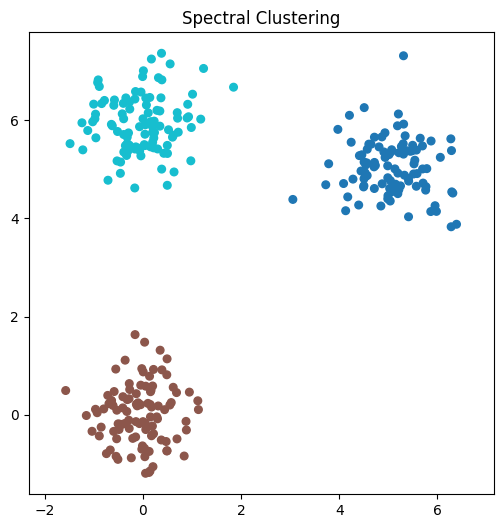

Adjusted Rand Index (Spectral Clustering): 1.000


In [13]:
# checking spectral clustering on synthetic data
spectral_labels = spectral_clustering(A, k=3, sigma=1.0, max_iters=100)
plt.figure(figsize=(6,6))
plt.scatter(A[:,0], A[:,1], c=spectral_labels, cmap="tab10", s=30)
plt.title("Spectral Clustering")
plt.axis("equal")
plt.show()
ari_spectral = adjusted_rand_score(true_labels, spectral_labels)
print(f"Adjusted Rand Index (Spectral Clustering): {ari_spectral:.3f}")

In [14]:
# Checking all three methods on MNIST
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Učitavanje MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data.astype(np.float32) / 255.0  # normaliziraj pixele
y_mnist = mnist.target.astype(int)

# Manji subset zbog računanja W
X_small = X_mnist[:1000]
y_small = y_mnist[:1000]

# K-means clustering
centroids_kmeans, labels_kmeans = kmeans(X_small, k=10, max_iters=50)
ari_kmeans = adjusted_rand_score(y_small, labels_kmeans)
nmi_kmeans = normalized_mutual_info_score(y_small, labels_kmeans)
print(f"K-means - ARI: {ari_kmeans:.3f}, NMI: {nmi_kmeans:.3f}")

# QR-based clustering
labels_qr = kmeans_QR(X_small, k=10)
ari_qr = adjusted_rand_score(y_small, labels_qr)
nmi_qr = normalized_mutual_info_score(y_small, labels_qr)
print(f"QR-based - ARI: {ari_qr:.3f}, NMI: {nmi_qr:.3f}")

# Spectral clustering
labels_spectral = spectral_clustering(X_small, k=10, sigma=5.0, max_iters=50)
ari_spectral = adjusted_rand_score(y_small, labels_spectral)
nmi_spectral = normalized_mutual_info_score(y_small, labels_spectral)
print(f"Spectral - ARI: {ari_spectral:.3f}, NMI: {nmi_spectral:.3f}")

K-means - ARI: 0.352, NMI: 0.478
QR-based - ARI: 0.201, NMI: 0.319
Spectral - ARI: 0.371, NMI: 0.483
